In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import warnings
pd.set_option('display.float_format', lambda x : '%.30f' % x)
pd.options.display.max_columns = None
pd.options.display.float_format = "{:,.3f}".format
warnings.filterwarnings('ignore')
sns.set()

In [2]:
cars = pd.read_csv('Car Price.csv')
cars.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,"13,495.000"
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,"16,500.000"
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.680,3.470,9.000,154,5000,19,26,"16,500.000"
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337,ohc,four,109,mpfi,3.190,3.400,10.000,102,5500,24,30,"13,950.000"
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.190,3.400,8.000,115,5500,18,22,"17,450.000"


In [3]:
cars.shape

(205, 26)

In [4]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000
mean,103.000,0.834,98.757,174.049,65.908,53.725,"2,555.566",126.907,3.330,3.255,10.143,104.117,"5,125.122",25.220,30.751,"13,276.711"
std,59.323,1.245,6.022,12.337,2.145,2.444,520.680,41.643,0.271,0.314,3.972,39.544,476.986,6.542,6.886,"7,988.852"
min,1.000,-2.000,86.600,141.100,60.300,47.800,"1,488.000",61.000,2.540,2.070,7.000,48.000,"4,150.000",13.000,16.000,"5,118.000"
25%,52.000,0.000,94.500,166.300,64.100,52.000,"2,145.000",97.000,3.150,3.110,8.600,70.000,"4,800.000",19.000,25.000,"7,788.000"
50%,103.000,1.000,97.000,173.200,65.500,54.100,"2,414.000",120.000,3.310,3.290,9.000,95.000,"5,200.000",24.000,30.000,"10,295.000"
75%,154.000,2.000,102.400,183.100,66.900,55.500,"2,935.000",141.000,3.580,3.410,9.400,116.000,"5,500.000",30.000,34.000,"16,503.000"
max,205.000,3.000,120.900,208.100,72.300,59.800,"4,066.000",326.000,3.940,4.170,23.000,288.000,"6,600.000",49.000,54.000,"45,400.000"


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
cars['CarName'].head()

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: CarName, dtype: object

In [7]:
cars['CarName'].apply(lambda x : x.split(' ')[0])

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [8]:
#Splitting company name from CarName column
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,"13,495.000"
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,"16,500.000"
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.680,3.470,9.000,154,5000,19,26,"16,500.000"
3,4,2,audi,gas,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337,ohc,four,109,mpfi,3.190,3.400,10.000,102,5500,24,30,"13,950.000"
4,5,2,audi,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.190,3.400,8.000,115,5500,18,22,"17,450.000"


In [9]:
cars.loc[cars.CompanyName.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,"16,500.000"
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.680,3.470,9.000,154,5000,19,26,"16,500.000"
4,5,2,audi,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.190,3.400,8.000,115,5500,18,22,"17,450.000"
5,6,2,audi,gas,std,two,sedan,fwd,front,99.800,177.300,66.300,53.100,2507,ohc,five,136,mpfi,3.190,3.400,8.500,110,5500,19,25,"15,250.000"
6,7,1,audi,gas,std,four,sedan,fwd,front,105.800,192.700,71.400,55.700,2844,ohc,five,136,mpfi,3.190,3.400,8.500,110,5500,19,25,"17,710.000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.100,188.800,68.900,55.500,2952,ohc,four,141,mpfi,3.780,3.150,9.500,114,5400,23,28,"16,845.000"
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.100,188.800,68.800,55.500,3049,ohc,four,141,mpfi,3.780,3.150,8.700,160,5300,19,25,"19,045.000"
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.100,188.800,68.900,55.500,3012,ohcv,six,173,mpfi,3.580,2.870,8.800,134,5500,18,23,"21,485.000"
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.100,188.800,68.900,55.500,3217,ohc,six,145,idi,3.010,3.400,23.000,106,4800,26,27,"22,470.000"


In [10]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
cars.loc[cars.CompanyName.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,"16,500.000"
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.680,3.470,9.000,154,5000,19,26,"16,500.000"
4,5,2,audi,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.190,3.400,8.000,115,5500,18,22,"17,450.000"
5,6,2,audi,gas,std,two,sedan,fwd,front,99.800,177.300,66.300,53.100,2507,ohc,five,136,mpfi,3.190,3.400,8.500,110,5500,19,25,"15,250.000"
6,7,1,audi,gas,std,four,sedan,fwd,front,105.800,192.700,71.400,55.700,2844,ohc,five,136,mpfi,3.190,3.400,8.500,110,5500,19,25,"17,710.000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.100,188.800,68.900,55.500,2952,ohc,four,141,mpfi,3.780,3.150,9.500,114,5400,23,28,"16,845.000"
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.100,188.800,68.800,55.500,3049,ohc,four,141,mpfi,3.780,3.150,8.700,160,5300,19,25,"19,045.000"
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.100,188.800,68.900,55.500,3012,ohcv,six,173,mpfi,3.580,2.870,8.800,134,5500,18,23,"21,485.000"
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.100,188.800,68.900,55.500,3217,ohc,six,145,idi,3.010,3.400,23.000,106,4800,26,27,"22,470.000"


In [13]:
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [14]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

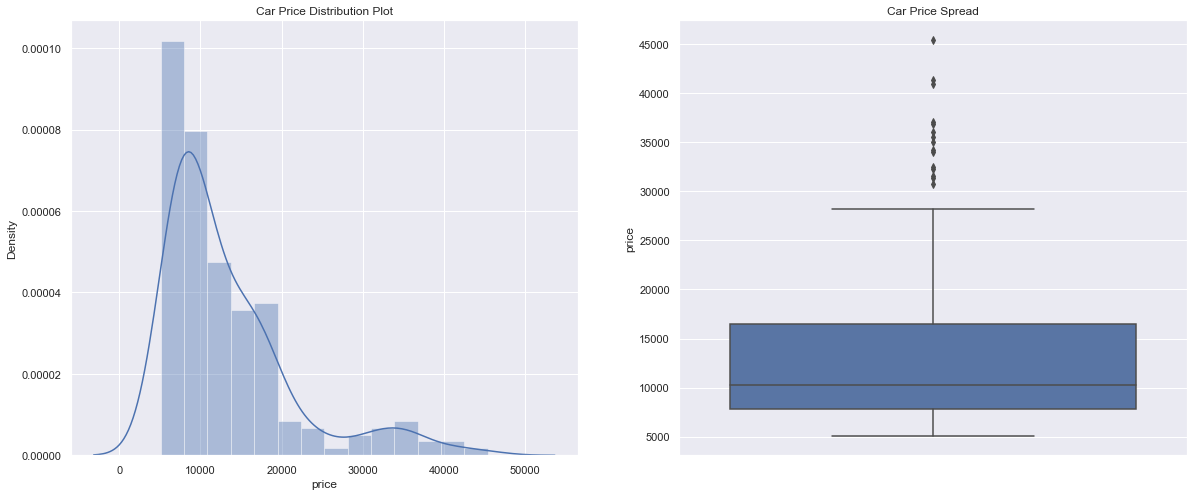

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [16]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000
mean    13,276.711
std      7,988.852
min      5,118.000
25%      7,788.000
50%     10,295.000
75%     16,503.000
85%     18,500.000
90%     22,563.000
100%    45,400.000
max     45,400.000
Name: price, dtype: float64


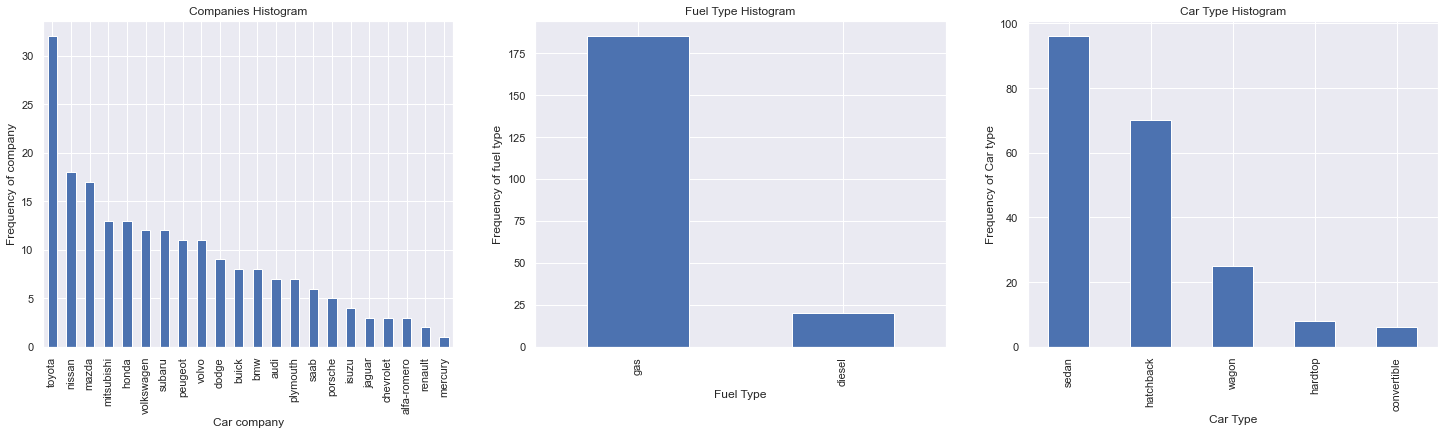

In [17]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind = 'bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot(kind = 'bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

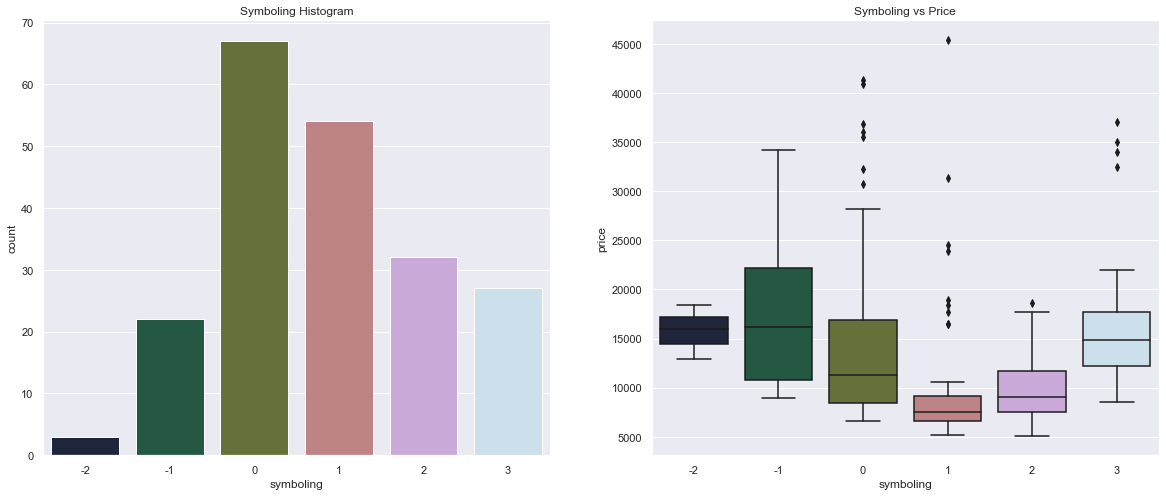

In [18]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(cars.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()

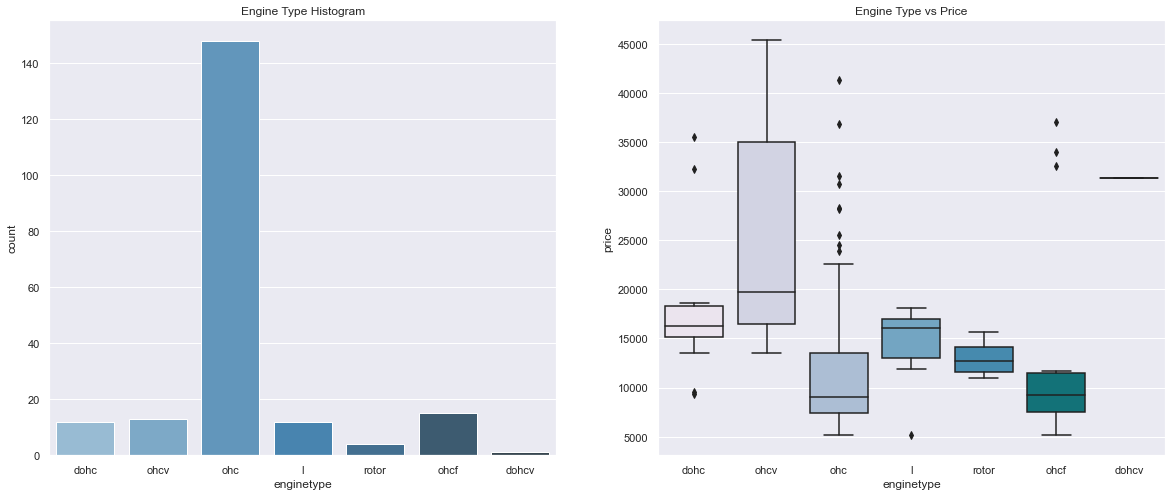

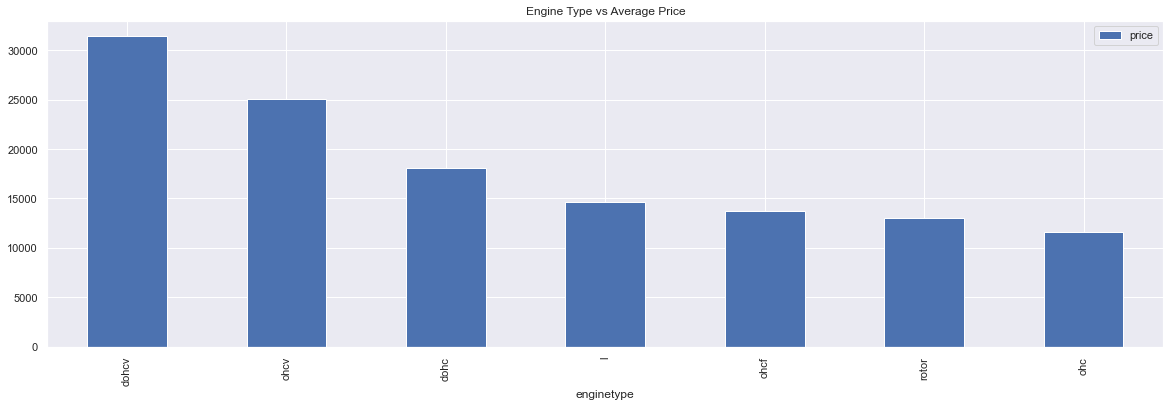

In [19]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(cars.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(20,6))
plt.title('Engine Type vs Average Price')
plt.show()

<Figure size 1800x432 with 0 Axes>

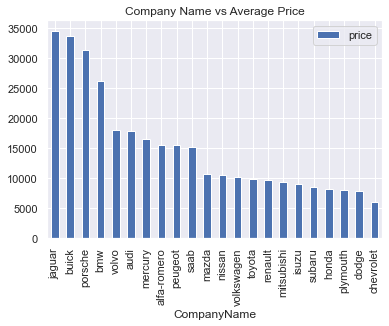

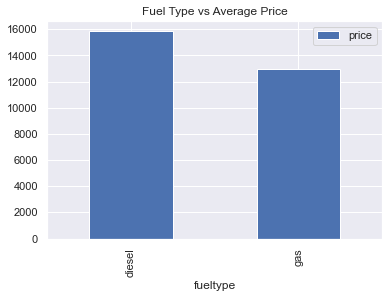

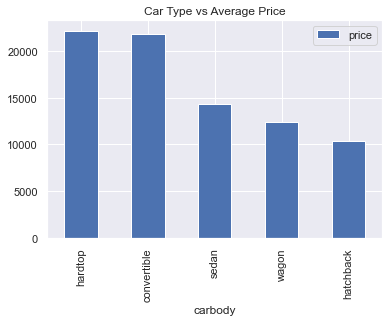

In [20]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

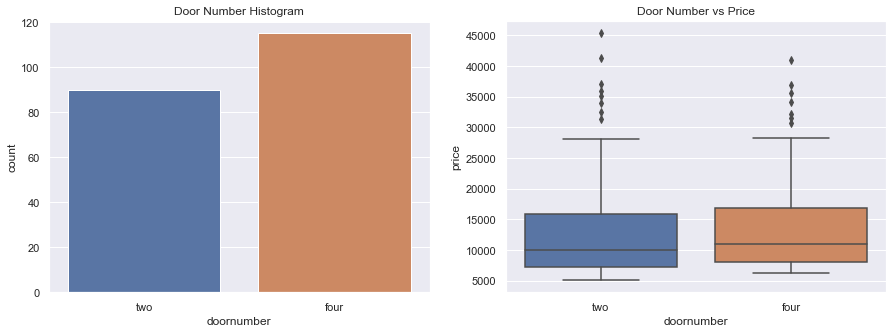

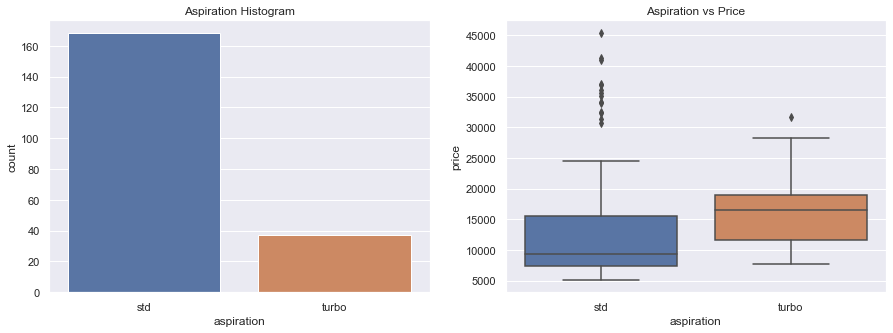

In [21]:
# diesel has higher average price than gas.
# hardtop and convertible have higher average price.
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(cars.doornumber)

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price)

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(cars.aspiration)

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price)

plt.show()

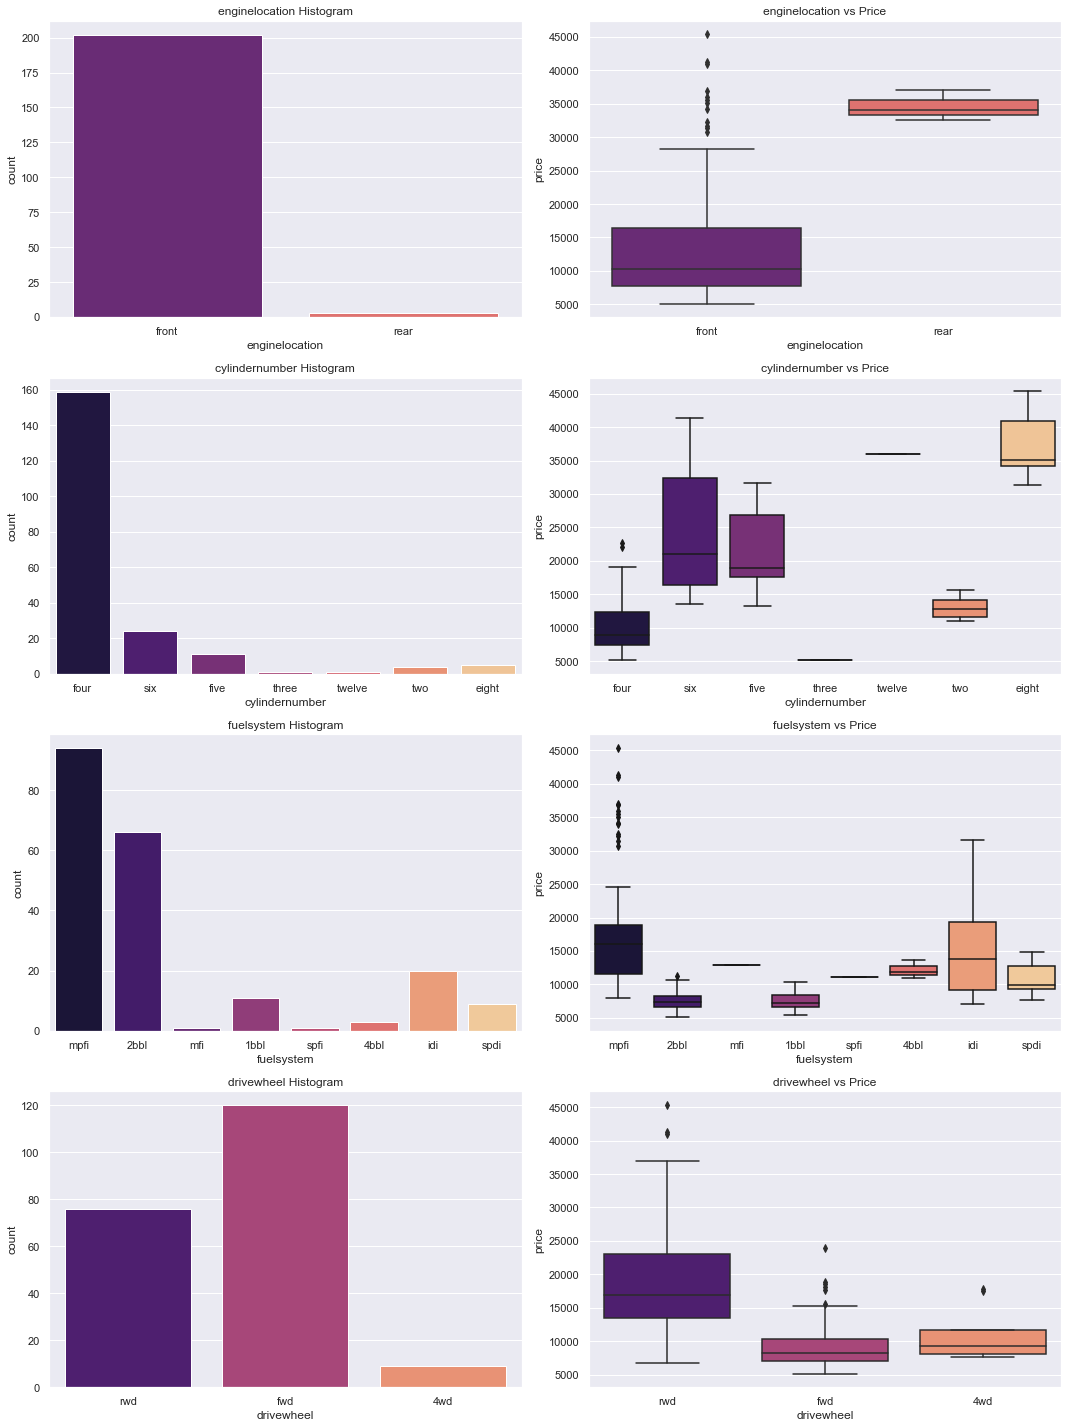

In [22]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(cars[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

In [23]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

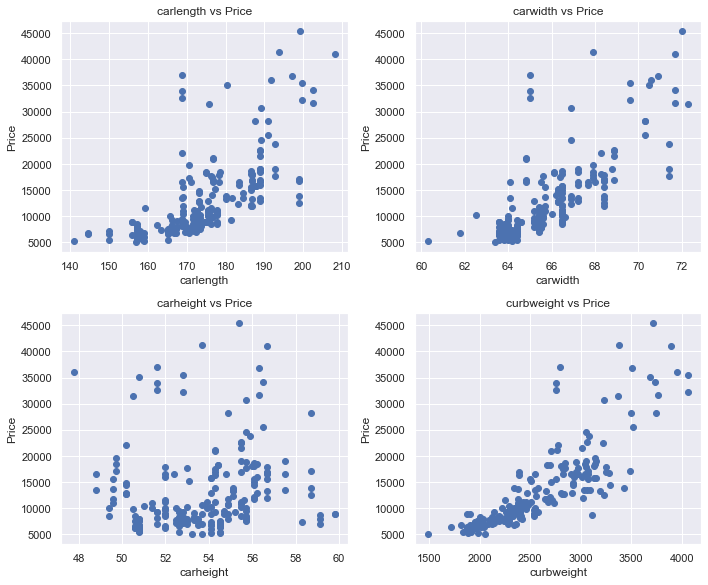

In [24]:
def scatter(x, fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars["price"])
    plt.title(x+" vs Price")
    plt.ylabel("Price")
    plt.xlabel(x)
    
plt.figure(figsize=(10,20))

scatter('carlength',1)
scatter('carwidth',2)
scatter('carheight',3)
scatter('curbweight',4)

plt.tight_layout()

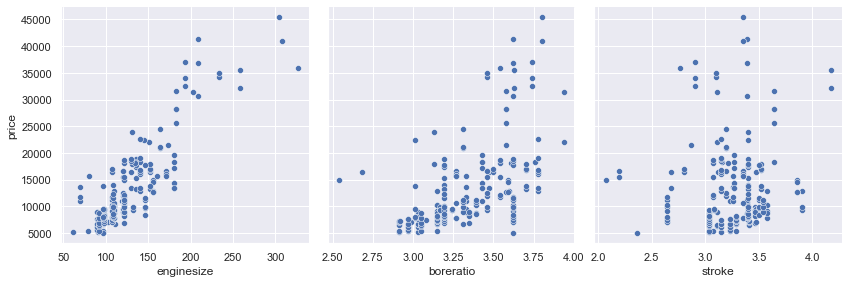

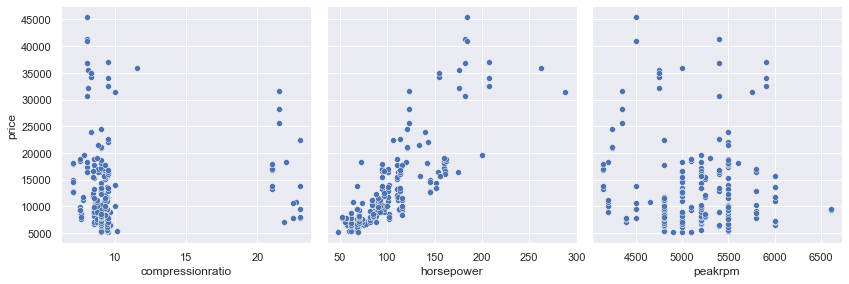

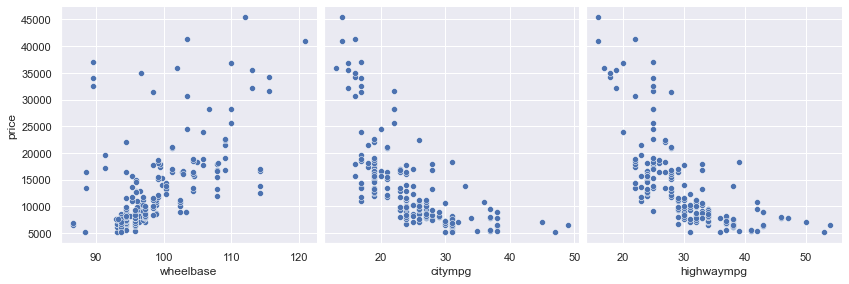

In [25]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z],y_vars="price",kind = "scatter",size = 4)
    plt.show()
    
pp('enginesize','boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase','citympg', 'highwaympg')

In [26]:
np.corrcoef(cars["carlength"],cars["carwidth"])[0,1]

0.841118268481846

In [27]:
cars[["citympg","highwaympg"]]

,citympg,highwaympg
0,21,27
1,21,27
2,19,26
3,24,30
4,18,22
...,...,...
200,23,28
201,19,25
202,18,23
203,26,27


In [28]:
cars["fueleconomy"] = (cars["citympg"]*0.70) + (cars["highwaympg"]*0.30)

In [29]:
cars["fueleconomy"]

0     22.800
1     22.800
2     21.100
3     25.800
4     19.200
       ...  
200   24.500
201   20.800
202   19.500
203   26.300
204   20.800
Name: fueleconomy, Length: 205, dtype: float64

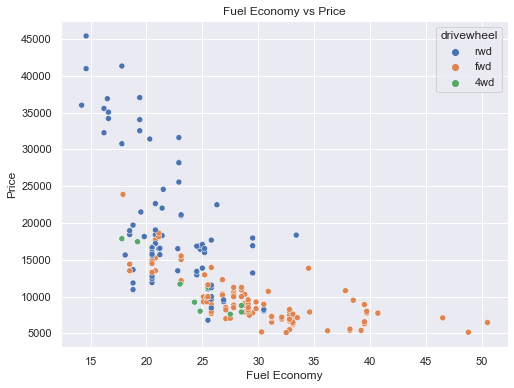

<Figure size 432x288 with 0 Axes>

In [30]:
plt.figure(figsize=(8,6))

plt.title("Fuel Economy vs Price")
sns.scatterplot(x=cars["fueleconomy"], y = cars["price"], hue = cars["drivewheel"])
plt.xlabel("Fuel Economy")
plt.ylabel("Price")

plt.show()
plt.tight_layout()

In [31]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueleconomy'],
      dtype='object')

In [32]:
cars_lr = cars[["price", 'fueltype', 'aspiration','enginetype',
       'cylindernumber',
    'carbody', 'drivewheel', 'wheelbase',
       'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
        'horsepower','fueleconomy']]

In [33]:
cars_lr.head()

,price,fueltype,aspiration,enginetype,cylindernumber,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,stroke,horsepower,fueleconomy
0,"13,495.000",gas,std,dohc,four,convertible,rwd,88.600,168.800,64.100,2548,130,3.470,2.680,111,22.800
1,"16,500.000",gas,std,dohc,four,convertible,rwd,88.600,168.800,64.100,2548,130,3.470,2.680,111,22.800
2,"16,500.000",gas,std,ohcv,six,hatchback,rwd,94.500,171.200,65.500,2823,152,2.680,3.470,154,21.100
3,"13,950.000",gas,std,ohc,four,sedan,fwd,99.800,176.600,66.200,2337,109,3.190,3.400,102,25.800
4,"17,450.000",gas,std,ohc,five,sedan,4wd,99.400,176.600,66.400,2824,136,3.190,3.400,115,19.200


In [34]:
# pd.get_dummies(df[x])

In [35]:
def dummies(x,df):
    temp = pd.get_dummies(df[x])
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

cars_lr = dummies("fueltype",cars_lr)
cars_lr = dummies("aspiration",cars_lr)
cars_lr = dummies("carbody",cars_lr)
cars_lr = dummies("enginetype",cars_lr)
cars_lr = dummies("cylindernumber",cars_lr)
cars_lr = dummies("drivewheel",cars_lr)

In [36]:
cars_lr

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,stroke,horsepower,fueleconomy,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,eight,five,four,six,three,twelve,two,4wd,fwd,rwd
0,"13,495.000",88.600,168.800,64.100,2548,130,3.470,2.680,111,22.800,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,"16,500.000",88.600,168.800,64.100,2548,130,3.470,2.680,111,22.800,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,"16,500.000",94.500,171.200,65.500,2823,152,2.680,3.470,154,21.100,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,"13,950.000",99.800,176.600,66.200,2337,109,3.190,3.400,102,25.800,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4,"17,450.000",99.400,176.600,66.400,2824,136,3.190,3.400,115,19.200,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,"16,845.000",109.100,188.800,68.900,2952,141,3.780,3.150,114,24.500,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
201,"19,045.000",109.100,188.800,68.800,3049,141,3.780,3.150,160,20.800,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
202,"21,485.000",109.100,188.800,68.900,3012,173,3.580,2.870,134,19.500,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
203,"22,470.000",109.100,188.800,68.900,3217,145,3.010,3.400,106,26.300,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [37]:
cor = np.abs(cars_lr.corr()["price"])
cor[cor > 0.5]

price         1.000
wheelbase     0.578
carlength     0.683
carwidth      0.759
curbweight    0.835
enginesize    0.874
boreratio     0.553
horsepower    0.808
fueleconomy   0.694
four          0.698
fwd           0.602
rwd           0.639
Name: price, dtype: float64

In [38]:
feature = cor[cor > 0.5].index
feature

Index(['price', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'fueleconomy', 'four', 'fwd',
       'rwd'],
      dtype='object')

In [39]:
cars_lr = cars_lr.loc[:,feature]
cars_lr.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,fueleconomy,four,fwd,rwd
0,"13,495.000",88.600,168.800,64.100,2548,130,3.470,111,22.800,1,0,1
1,"16,500.000",88.600,168.800,64.100,2548,130,3.470,111,22.800,1,0,1
2,"16,500.000",94.500,171.200,65.500,2823,152,2.680,154,21.100,0,0,1
3,"13,950.000",99.800,176.600,66.200,2337,109,3.190,102,25.800,1,1,0
4,"17,450.000",99.400,176.600,66.400,2824,136,3.190,115,19.200,0,0,0


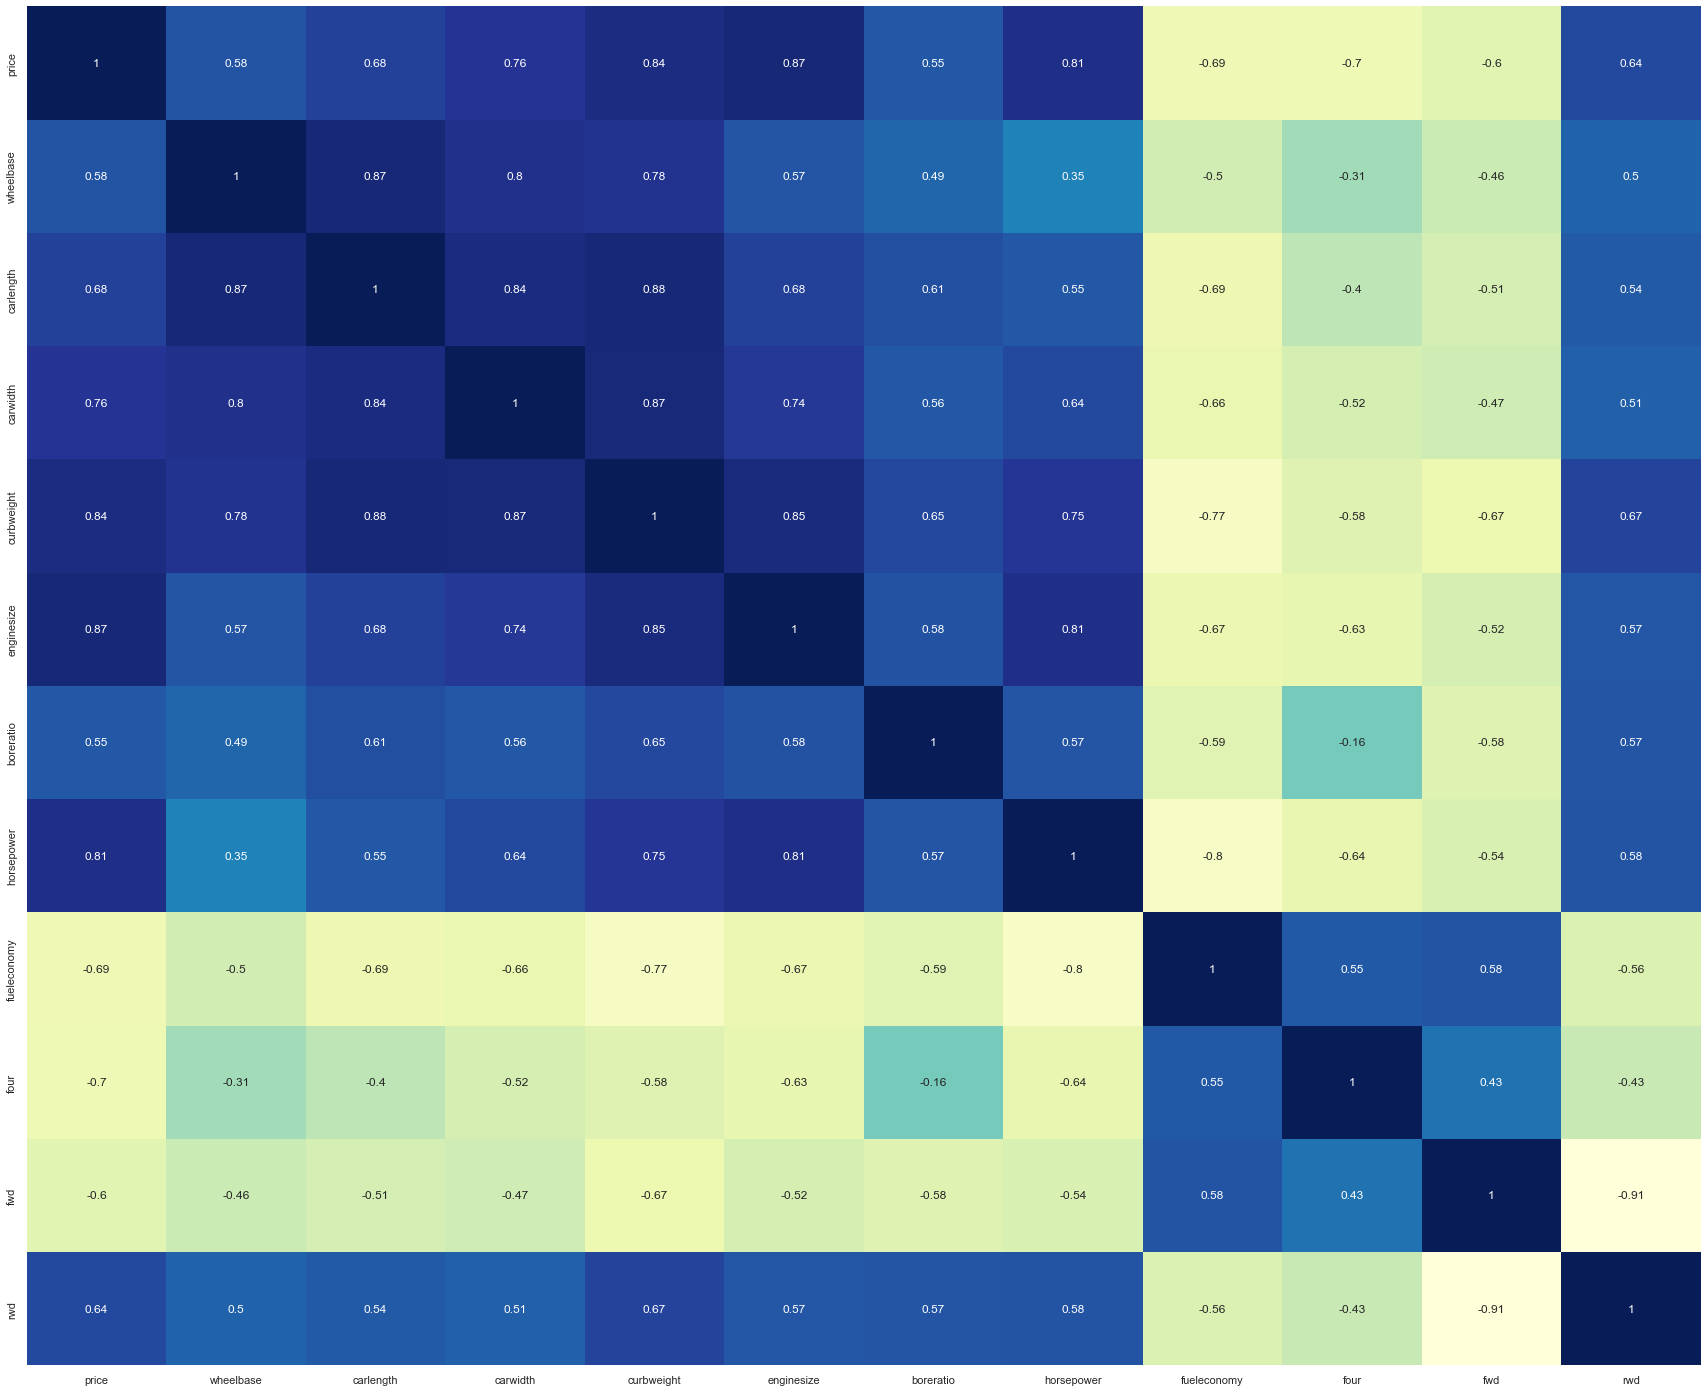

In [40]:
plt.figure(figsize=(30,25))

sns.heatmap(cars_lr.corr(),annot = True, cmap = "YlGnBu", cbar = False)
plt.show()

In [41]:
cars_lr.shape

(205, 12)

In [42]:
y = cars_lr["price"]
X = cars_lr[feature[1:]]

In [43]:
cars_lr

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,fueleconomy,four,fwd,rwd
0,"13,495.000",88.600,168.800,64.100,2548,130,3.470,111,22.800,1,0,1
1,"16,500.000",88.600,168.800,64.100,2548,130,3.470,111,22.800,1,0,1
2,"16,500.000",94.500,171.200,65.500,2823,152,2.680,154,21.100,0,0,1
3,"13,950.000",99.800,176.600,66.200,2337,109,3.190,102,25.800,1,1,0
4,"17,450.000",99.400,176.600,66.400,2824,136,3.190,115,19.200,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
200,"16,845.000",109.100,188.800,68.900,2952,141,3.780,114,24.500,1,0,1
201,"19,045.000",109.100,188.800,68.800,3049,141,3.780,160,20.800,1,0,1
202,"21,485.000",109.100,188.800,68.900,3012,173,3.580,134,19.500,0,0,1
203,"22,470.000",109.100,188.800,68.900,3217,145,3.010,106,26.300,0,0,1


In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler =  MinMaxScaler()
num_vars = cars_lr.columns
cars_lr[num_vars] = scaler.fit_transform(cars_lr[num_vars])

In [45]:
cars_lr.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,fueleconomy,four,fwd,rwd
0,0.208,0.058,0.413,0.317,0.411,0.260,0.664,0.262,0.237,1.000,0.000,1.000
1,0.283,0.058,0.413,0.317,0.411,0.260,0.664,0.262,0.237,1.000,0.000,1.000
2,0.283,0.230,0.449,0.433,0.518,0.343,0.100,0.442,0.190,0.000,0.000,1.000
3,0.219,0.385,0.530,0.492,0.329,0.181,0.464,0.225,0.320,1.000,1.000,0.000
4,0.306,0.373,0.530,0.508,0.518,0.283,0.464,0.279,0.138,0.000,0.000,0.000


In [46]:
cars_lr["price"] = cars["price"] 

In [47]:
cars_lr.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,fueleconomy,four,fwd,rwd
0,"13,495.000",0.058,0.413,0.317,0.411,0.260,0.664,0.262,0.237,1.000,0.000,1.000
1,"16,500.000",0.058,0.413,0.317,0.411,0.260,0.664,0.262,0.237,1.000,0.000,1.000
2,"16,500.000",0.230,0.449,0.433,0.518,0.343,0.100,0.442,0.190,0.000,0.000,1.000
3,"13,950.000",0.385,0.530,0.492,0.329,0.181,0.464,0.225,0.320,1.000,1.000,0.000
4,"17,450.000",0.373,0.530,0.508,0.518,0.283,0.464,0.279,0.138,0.000,0.000,0.000


In [48]:
from sklearn.model_selection import train_test_split


X_train , X_test, y_train, y_test = \
train_test_split(X,y, test_size= 0.25, train_size= 0.75, random_state=0)

In [49]:
print(f"X_train {X_train.shape} \nX_test {X_test.shape} \ny_train{y_train.shape} \ny_test{y_test.shape}")

X_train (153, 11) 
X_test (52, 11) 
y_train(153,) 
y_test(52,)


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [51]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [52]:
print(f"Coefficients : {model.coef_}")
print(f"intercept : {model.intercept_}")

Coefficients : [ 6.26373699e+00 -6.81014573e+00  5.63220755e+02  6.24744920e-01
  6.23123549e+01  1.72647857e+03  4.62936438e+01  1.12006638e+02
 -4.18667375e+03 -3.15313172e+02  2.35287170e+03]
intercept : -43886.212616771125


In [53]:
y_pred = model.predict(X_test)
y_pred

array([ 6217.41358049, 22460.84424539, 15527.91368206,  6796.23406986,
        9422.49504661, 15924.65271302,  6884.15341225,  5683.26879608,
       24974.40610854,  6205.03753545, 20209.0336558 , 35768.25795056,
       13295.5963909 , 14006.82013073,  6659.65921833, 15844.68536321,
       11253.34473113, 18612.30668961,  8694.2856044 ,  5786.29290684,
        9860.85135175, 14274.90928886, 11267.32984602, 15946.51878524,
       23926.22200276,  7247.75169987,  7100.26921011, 14362.48348732,
        6868.26848546,  6542.41889853,  8816.84723094,  9649.56357806,
       19153.61808204, 10956.65147346,  6573.03139963, 27841.77263079,
        8007.92543802, 13592.07969036,  5824.12311118, 36341.34016023,
        6637.79314612, 16152.11227527, 30120.01756105,  9711.83296938,
       10740.44865689,  6451.31514326,  5894.71928719, 15126.89142146,
       10536.37374497,  8858.08039568, 19343.61259482,  7606.40372834])

In [54]:
print(f"MAE : {metrics.mean_absolute_error(y_test,y_pred)}")

MAE : 2602.148833099101


In [55]:
print(f"RMSE : {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")

RMSE : 3726.8347704014873


In [56]:
model.score(X_train,y_train)

0.855831579996772

In [57]:
model.score(X_test,y_test)

0.8137365560281542

In [58]:
pd.DataFrame({"Actual Price":y_test, "Predicted Price":np.round(y_pred)})

,Actual Price,Predicted Price
52,"6,795.000","6,217.000"
181,"15,750.000","22,461.000"
5,"15,250.000","15,528.000"
18,"5,151.000","6,796.000"
188,"9,995.000","9,422.000"
170,"11,199.000","15,925.000"
76,"5,389.000","6,884.000"
154,"7,898.000","5,683.000"
104,"17,199.000","24,974.000"
33,"6,529.000","6,205.000"
